# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
petrol = pd.read_csv('petrol.csv', skiprows = 0)
from sklearn.model_selection import train_test_split

In [3]:
petrol.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [4]:
petrol.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax             48 non-null float64
 income         48 non-null int64
 highway        48 non-null int64
 dl             48 non-null float64
 consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
petrol.shape


(48, 5)

In [6]:
#convert to list 
#just a verification using numbers
IQR1 = petrol.quantile(0.25)
IQR3 = petrol.quantile(0.75)
IQR = IQR3 - IQR1
Max_cap = IQR3+ 1.5*IQR
Min_cap = IQR1 - 1.5*IQR
petrol[((petrol>Max_cap) | (petrol<Min_cap))] = np.nan

petrol.dropna(inplace=True)
petrol
#petrol
#np.nan(petrol[petrol > Max_cap & petrol < Min_cap])



,tax,income,highway,dl,consumption
0,9.00,3571,1976.0,0.525,541.0
1,9.00,4092,1250.0,0.572,524.0
2,9.00,3865,1586.0,0.580,561.0
3,7.50,4870,2351.0,0.529,414.0
4,8.00,4399,431.0,0.544,410.0
6,8.00,5319,11868.0,0.451,344.0
7,8.00,5126,2138.0,0.553,467.0
8,8.00,4447,8577.0,0.529,464.0
9,7.00,4512,8507.0,0.552,498.0
10,8.00,4391,5939.0,0.530,580.0


##### Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

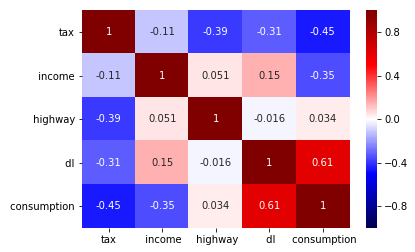

In [7]:
sns.heatmap(petrol[['tax', ' income', ' highway', ' dl', ' consumption']].corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

According to the heatmap, there is high correlation between proportion of drivers and consumption 

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [8]:
Y = petrol[[' consumption']]

In [9]:
X = petrol[['tax', ' dl']]

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 45)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
lm.coef_

array([[-35.93449939, 713.44996929]])

In [15]:
coeff_df = pd.DataFrame(lm.coef_, columns = [['tax', ' dl']])
coeff_df


,tax,dl
0,-35.934499,713.449969


# R-Square 

In [16]:
prediction = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

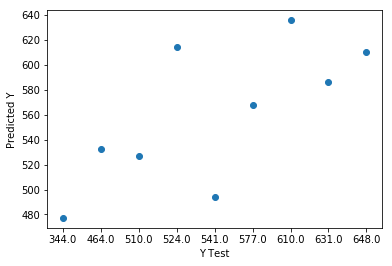

In [17]:
plt.scatter(Y_test,prediction) #scater plot to check if there is a correlation between prediction n test data
plt.xlabel('Y Test') # 4 lines because of east west etc
plt.ylabel('Predicted Y')

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [18]:
from sklearn import metrics 
r_squared = metrics.r2_score(Y_test,prediction)

r_squared

0.4785636380907783

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [19]:
Y2 = petrol[[' consumption']]
X2 = petrol[['tax', ' dl', ' income', ' highway']]

In [20]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 45)

# Question 9: Print the coefficients of the multilinear regression model

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train2, Y_train2)
lm.coef_

array([[-3.24207247e+01,  1.09925248e+03, -8.13155584e-02,
        -1.35932449e-03]])

Text(0,0.5,'Predicted Y')

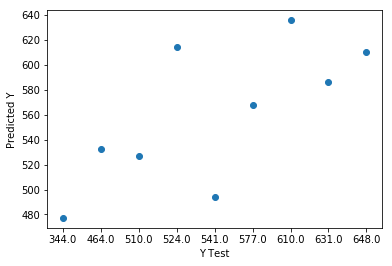

In [23]:
prediction2 = lm.predict(X_test2)
plt.scatter(Y_test,prediction) #scater plot to check if there is a correlation between prediction n test data
plt.xlabel('Y Test') # 4 lines because of east west etc
plt.ylabel('Predicted Y')

In [24]:
from sklearn import metrics 
r_squared = metrics.r2_score(Y_test2,prediction2)

r_squared

0.8111555513053684

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

R = 1-SSE(sum of squred errors)/SST(sum of total squared errors). So in order for R to maximize we need to minimize SSE. Now SSE will decrease as we add more explanatory variables to our model. This is because as we add more explanatory variables to our regression model,our regression model will fit the data points better and hence sum of squared error will reduce. Hence R-squared will increase even when the variable is not significant to our model.

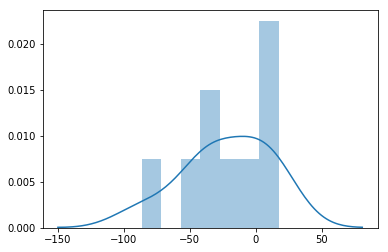

In [31]:
sns.distplot(Y_test2-prediction2,bins=7)

In [32]:
Y_test2 - prediction2

,consumption
8,-30.173558
32,-86.368355
47,-26.162008
27,17.440718
45,-1.863755
6,10.948839
38,-50.499759
0,3.438846
46,-38.311469
